In [5]:
import numpy as np
import pandas as pd
from itertools import combinations
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import glob
import pickle

#Biopython
from Bio import *
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")


In [6]:
KE70_C_TSA = "/Volumes/Nia_HardDrive/ensemble_refinement_KEs/KE70/Core/withTSA/ENSEMBLE_ref_tx_1_ptls_1.0_tbath_5/KE705NT_FRS005_p7_5March2022_refine_10-coot-3_refine_001_refine_001.updated_ensemble.pdb"
KE70_E_TSA = "/Volumes/Nia_HardDrive/ensemble_refinement_KEs/KE70/Evolved/withTSA_rerefined_secondTry/ENSEMBLE_ref_tx_0.5_ptls_0.7_tbath_5/3q2d_loop-coot-5_refine_001_ensemble.pdb"

In [7]:
def chi1_chi2_chi3(pdbfile,residue_id):
        chi1s=[]
        chi2s=[]
        chi3s=[]
        structure = PDBParser().get_structure(pdbfile, pdbfile)
        for i in range(len(structure)):
            model=structure[i]
            chain=model['A']
            chain.atom_to_internal_coordinates(verbose=True)
            for r in chain.get_residues():
                if r.get_id()[1]==residue_id:
                    chi1 = r.internal_coord.get_angle("chi1")
                    chi2 = r.internal_coord.get_angle("chi2")
                    #chi1_corr = convert_chi(chi1)
                    #chi2_corr = convert_chi(chi2)
                    chi1s.append(chi1)
                    chi2s.append(chi2)

                    try:
                    
                        chi3 = r.internal_coord.get_angle("chi3")
                        #chi3_corr = convert_chi(chi3)
                        chi3s.append(chi3)

                    except:
                        pass
            
        return chi1s,chi2s,chi3s


In [8]:
KE70_C_TSA_16 = chi1_chi2_chi3(KE70_C_TSA,16)

KE70_E_TSA_16 = chi1_chi2_chi3(KE70_E_TSA,16)


chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain 

In [9]:
KE70_C_TSA_48 = chi1_chi2_chi3(KE70_C_TSA,48)

KE70_E_TSA_48 = chi1_chi2_chi3(KE70_E_TSA,48)


chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASP  25  due to MaxPeptideBond (1.4 angstroms) exceeded
chain 

In [10]:
def convert_chi_corr(chi): 
    if chi == "None": 
        return(chi) 
    else: 
        x = float(chi)
        y=0.0
        if -180 <= x < 180: 
            y = x 
        elif 180 <= x: 
            y = 360 - x
        elif x < -180: 
            y = x + 360 
        #print(chi, y)
        return(y)

def convert_chi(chi): 
    if chi == "None": 
        return(chi) 
    else: 
        x = float(chi)
        y=0.0
        if 0 <= x < 90: 
            y = 180 - x 
        elif 90 <= x <= 180: 
            y = x
        elif -90 <= x < 0: 
            y = x + 180
        elif -180 <= x < -90: 
            y = abs(x) 
        #print(chi, y)
        return(y)

In [11]:
KE70_C_TSA_16_0_180 = [[],[],[]]
KE70_C_TSA_16_0_180[0] = [convert_chi(x) for x in KE70_C_TSA_16[0]]
KE70_C_TSA_16_0_180[1] = [convert_chi(x) for x in KE70_C_TSA_16[1]]

KE70_E_TSA_16_0_180 = [[],[],[]]
KE70_E_TSA_16_0_180[0] = [convert_chi(x) for x in KE70_E_TSA_16[0]]
KE70_E_TSA_16_0_180[1] = [convert_chi(x) for x in KE70_E_TSA_16[1]]


In [12]:
KE70_C_TSA_48_0_180 = [[],[],[]]
KE70_C_TSA_48_0_180[0] = [convert_chi(x) for x in KE70_C_TSA_48[0]]
KE70_C_TSA_48_0_180[1] = [convert_chi(x) for x in KE70_C_TSA_48[1]]

KE70_E_TSA_48_0_180 = [[],[],[]]
KE70_E_TSA_48_0_180[0] = [convert_chi(x) for x in KE70_E_TSA_48[0]]
KE70_E_TSA_48_0_180[1] = [convert_chi(x) for x in KE70_E_TSA_48[1]]


In [13]:
# import seaborn
import seaborn as sns

def plot_chi1_chi2(x,y):
    sns.set(font_scale = 3)
    sns.set_style("white")
    g = sns.JointGrid(x=x,y=y,
                      height=8, 
                      ratio=5,xlim=(85,185),ylim=(85,185))
    g.plot_joint(sns.scatterplot,fc="black",s=200)
    g.plot_marginals(sns.kdeplot,c="black")
    g.ax_joint.set_xticks(range(90,185,30))
    g.ax_joint.set_yticks(range(90,185,30))

In [16]:
KE70_C_TSA_16_0_180

[[109.0323808883099,
  104.66920426196467,
  112.829093882635,
  112.91270826277086,
  103.33122439835704,
  105.59844121439602,
  112.51098830862327,
  103.85624436568317,
  99.51520236206558,
  107.41042300967031,
  123.05114281329185,
  114.05959324784763,
  118.82280596134363,
  108.64750060616572,
  103.36144054376882,
  105.63801022176517,
  104.59771210035446,
  113.03440794279163,
  113.53835239538678,
  102.52752021469952,
  106.10291400454591,
  111.9445221553715,
  102.24132762518225,
  115.97466813003402,
  107.52070376273689,
  111.12890902757358,
  111.98321109412751,
  115.96871225800378,
  112.27388051124045,
  105.40211892568811,
  112.87693633952001,
  109.1007482932016,
  102.93008674771102,
  114.21651838109332,
  109.77988484926193,
  103.21505334206265,
  117.47396156593209,
  104.10141590408875,
  102.83467225701848,
  106.92343903509143,
  109.25828974880514,
  108.61095459607135],
 [155.61196680624778,
  156.08967128858896,
  165.1304049919656,
  166.0450119748

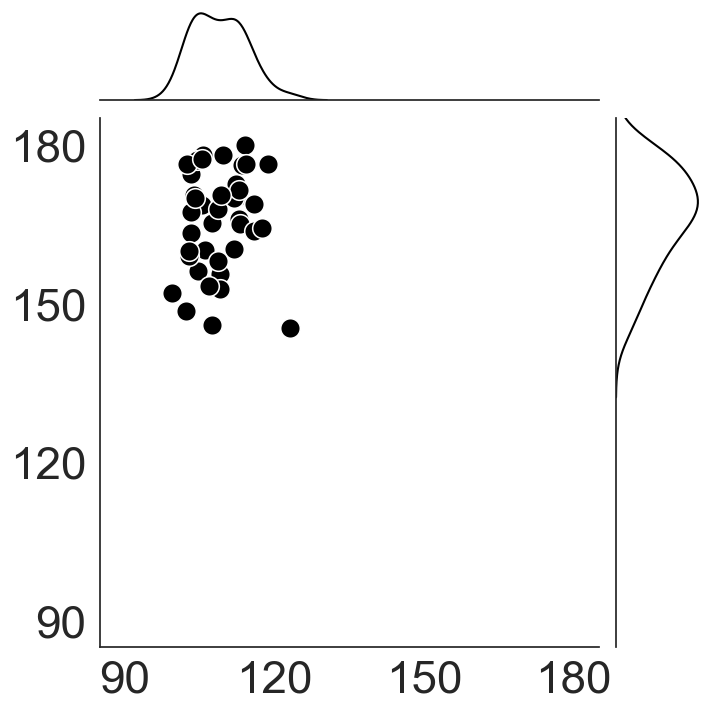

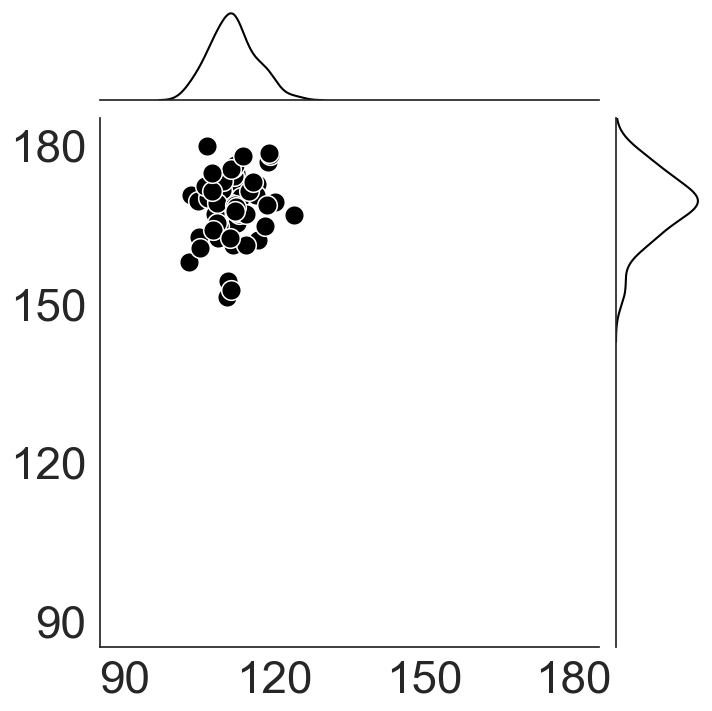

In [14]:
plot_chi1_chi2(KE70_C_TSA_16_0_180[0],KE70_C_TSA_16_0_180[1])
plot_chi1_chi2(KE70_E_TSA_16_0_180[0],KE70_E_TSA_16_0_180[1])



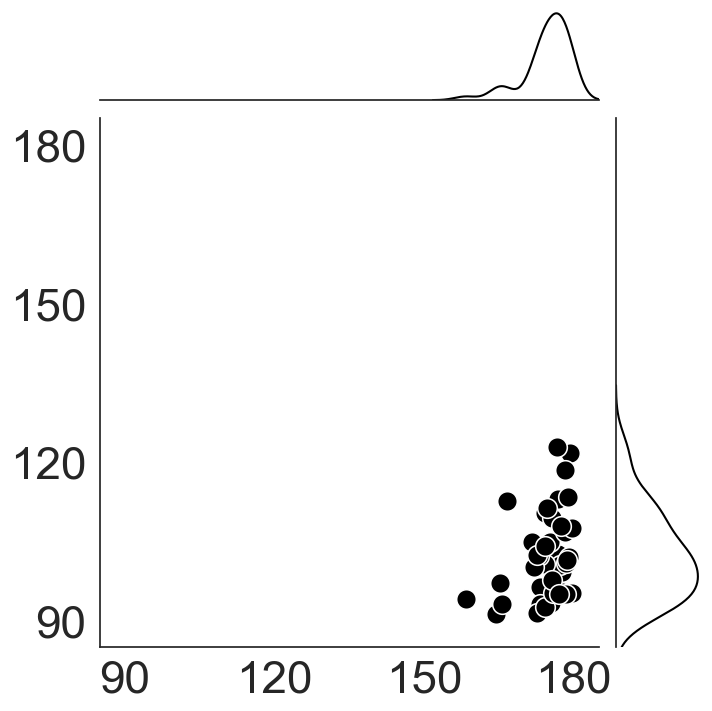

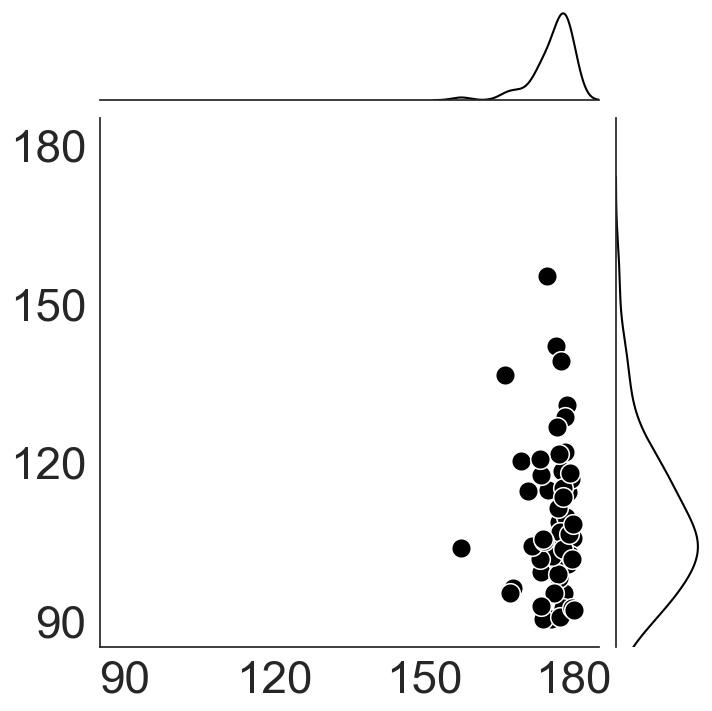

In [15]:
plot_chi1_chi2(KE70_C_TSA_48_0_180[0],KE70_C_TSA_48_0_180[1])
plot_chi1_chi2(KE70_E_TSA_48_0_180[0],KE70_E_TSA_48_0_180[1])
